<a href="https://colab.research.google.com/github/John260260/Deep_Learning/blob/main/Bank_credit_default_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from functools import reduce

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/creditcarddefault.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.shape

(30000, 25)

In [ ]:
df['BILL_AMT']=df['BILL_AMT1']+ df['BILL_AMT2']+ df['BILL_AMT3']+ df['BILL_AMT4']+ df['BILL_AMT5']+ df['BILL_AMT6']
df['PAY_AMT']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

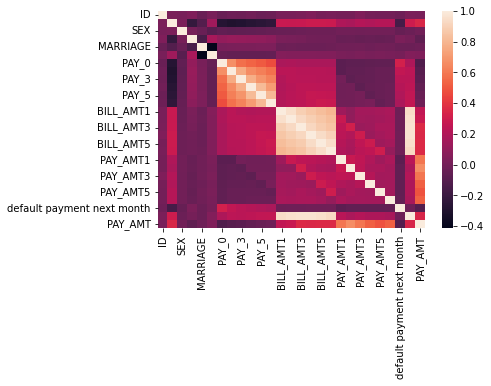

In [ ]:
sns.heatmap(df.corr())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


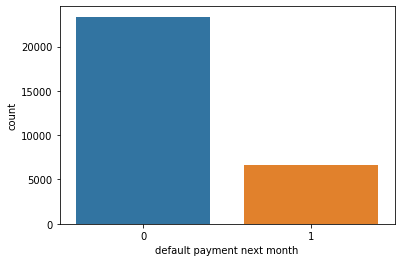

In [ ]:
sns.countplot(df['default payment next month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


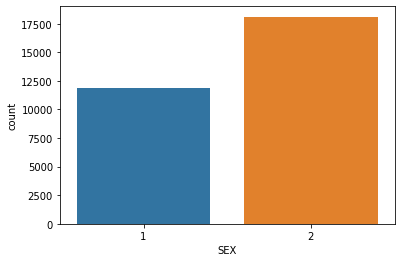

In [ ]:
sns.countplot(df['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


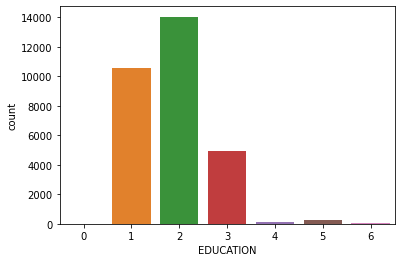

In [ ]:
sns.countplot(df['EDUCATION'])

In [ ]:
Counter(df['EDUCATION'])

Counter({0: 14, 1: 10585, 2: 14030, 3: 4917, 4: 123, 5: 280, 6: 51})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


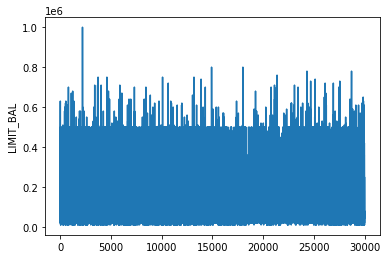

In [ ]:
sns.lineplot(df['LIMIT_BAL'].index,df['LIMIT_BAL'])

In [ ]:
df.rename(columns={'default payment next month':'Default'}, inplace=True)

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default',
       'BILL_AMT', 'PAY_AMT'],
      dtype='object')

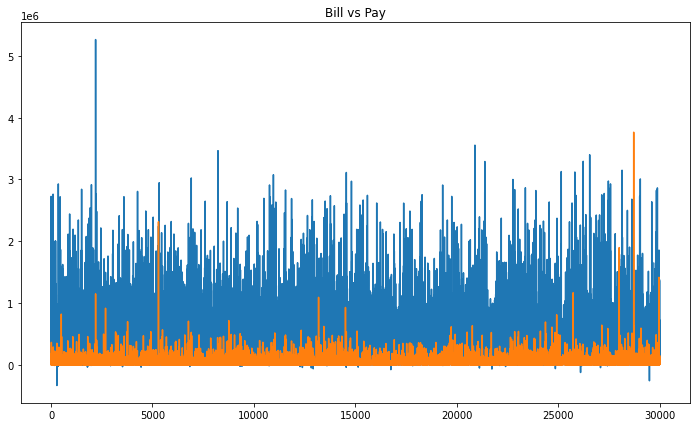

In [ ]:
bill_amt=df['BILL_AMT']
pay_amt=df['PAY_AMT']
target=tf.Variable(df['Default'])
plt.figure(figsize=(12,7))
plt.plot(bill_amt, label='Bill_Amount')
plt.plot(pay_amt, label='Pay_Amount')
plt.title('Bill vs Pay')
plt.show()

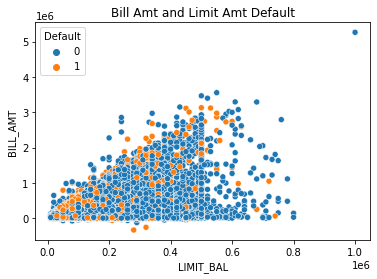

In [ ]:
sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT',hue='Default',data=df)
plt.title('Bill Amt and Limit Amt Default')
plt.show()

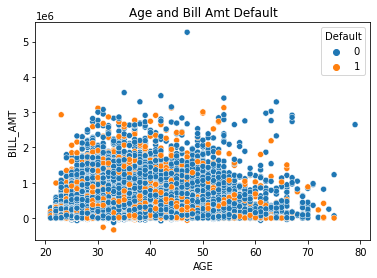

In [ ]:
sns.scatterplot(x='AGE',y='BILL_AMT',hue='Default',data=df)
plt.title('Age and Bill Amt Default')
plt.show()

<Figure size 1152x504 with 0 Axes>

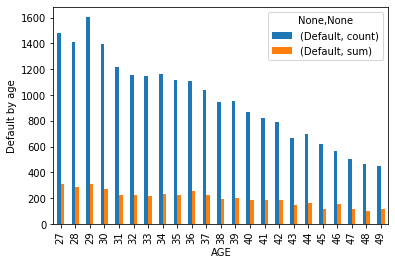

Default mostly occuring between age 27 and 36


In [ ]:
plt.figure(figsize=(16,7))
filter=(df['AGE']>26)&(df['AGE']<50)
grouped=df[['AGE','Default']][filter].groupby('AGE').agg(['count','sum'])
grouped.plot(kind='bar')
plt.ylabel('Default by age')
plt.show()
print('Default mostly occuring between age 27 and 36')

In [ ]:
NUMERIC=['LIMIT_BAL','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3',
         'BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','BILL_AMT','PAY_AMT']

LABELS= ['Default']

nf_credit_amount=250000
nf_payment_amount=250000
nf_age=60
nf_genric_factor=7

x=df[NUMERIC]
sex_dummies=pd.get_dummies(df['SEX'],prefix='_sex')
education_dummies=pd.get_dummies(df['EDUCATION'],prefix='edu')
marriage_dummies=pd.get_dummies(df['MARRIAGE'],prefix='_marriage')
x=pd.concat([x,sex_dummies],axis=1)
x=pd.concat([x,education_dummies],axis=1)
x=pd.concat([x,marriage_dummies],axis=1)
x['LIMIT_BAL']=x['LIMIT_BAL']/nf_credit_amount
x['BILL_AMT']=x['BILL_AMT']/nf_credit_amount
x['BILL_AMT1']=x['BILL_AMT1']/nf_credit_amount
x['BILL_AMT2']=x['BILL_AMT2']/nf_credit_amount
x['BILL_AMT3']=x['BILL_AMT3']/nf_credit_amount
x['BILL_AMT4']=x['BILL_AMT4']/nf_credit_amount
x['BILL_AMT5']=x['BILL_AMT5']/nf_credit_amount
x['BILL_AMT6']=x['BILL_AMT6']/nf_credit_amount

x['PAY_AMT']=x['PAY_AMT']/nf_payment_amount
x['PAY_AMT1']=x['PAY_AMT1']/nf_payment_amount
x['PAY_AMT2']=x['PAY_AMT2']/nf_payment_amount
x['PAY_AMT3']=x['PAY_AMT3']/nf_payment_amount
x['PAY_AMT4']=x['PAY_AMT4']/nf_payment_amount
x['PAY_AMT5']=x['PAY_AMT5']/nf_payment_amount
x['PAY_AMT6']=x['PAY_AMT6']/nf_payment_amount

x['AGE']=x['AGE']/nf_age

x['DEBT_RATIO']=(x['BILL_AMT']-x['PAY_AMT'])/x['LIMIT_BAL']
y=df[LABELS]

In [ ]:
x

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,BILL_AMT,PAY_AMT,_sex_1,_sex_2,edu_0,edu_1,edu_2,edu_3,edu_4,edu_5,edu_6,_marriage_0,_marriage_1,_marriage_2,_marriage_3,DEBT_RATIO
0,0.08,0.400000,2,2,-1,-1,-2,-2,0.015652,0.012408,0.002756,0.000000,0.000000,0.000000,0.000000,0.002756,0.000000,0.000000,0.000000,0.000000,0.030816,0.002756,0,1,0,0,1,0,0,0,0,0,1,0,0,0.350750
1,0.48,0.433333,-1,2,0,0,0,2,0.010728,0.006900,0.010728,0.013088,0.013820,0.013044,0.000000,0.004000,0.004000,0.004000,0.000000,0.008000,0.068308,0.020000,0,1,0,0,1,0,0,0,0,0,0,1,0,0.100642
2,0.36,0.566667,0,0,0,0,0,0,0.116956,0.056108,0.054236,0.057324,0.059792,0.062196,0.006072,0.006000,0.004000,0.004000,0.004000,0.020000,0.406612,0.044072,0,1,0,0,1,0,0,0,0,0,0,1,0,1.007056
3,0.20,0.616667,0,0,0,0,0,0,0.187960,0.192932,0.197164,0.113256,0.115836,0.118188,0.008000,0.008076,0.004800,0.004400,0.004276,0.004000,0.925336,0.033552,0,1,0,0,1,0,0,0,0,0,1,0,0,4.458920
4,0.20,0.950000,-1,0,-1,0,0,0,0.034468,0.022680,0.143340,0.083760,0.076584,0.076524,0.008000,0.146724,0.040000,0.036000,0.002756,0.002716,0.437356,0.236196,1,0,0,0,1,0,0,0,0,0,1,0,0,1.005800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.88,0.650000,0,0,0,0,0,0,0.755792,0.771260,0.833460,0.352016,0.124948,0.063920,0.034000,0.080000,0.020012,0.012188,0.020000,0.004000,2.901396,0.170200,1,0,0,0,0,1,0,0,0,0,1,0,0,3.103632
29996,0.60,0.716667,-1,-1,-1,-1,0,0,0.006732,0.007312,0.014008,0.035916,0.020760,0.000000,0.007348,0.014104,0.035992,0.000516,0.000000,0.000000,0.084728,0.057960,1,0,0,0,0,1,0,0,0,0,0,1,0,0.044613
29997,0.12,0.616667,4,3,2,-1,0,0,0.014260,0.013424,0.011032,0.083512,0.082328,0.077428,0.000000,0.000000,0.088000,0.016800,0.008000,0.012400,0.281984,0.125200,1,0,0,0,1,0,0,0,0,0,0,1,0,1.306533
29998,0.32,0.683333,1,-1,0,0,0,-1,-0.006580,0.313516,0.305216,0.211096,0.047420,0.195776,0.343600,0.013636,0.004712,0.007704,0.211856,0.007216,1.066444,0.588724,1,0,0,0,0,1,0,0,0,0,1,0,0,1.492875


In [ ]:
df.shape

(30000, 27)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

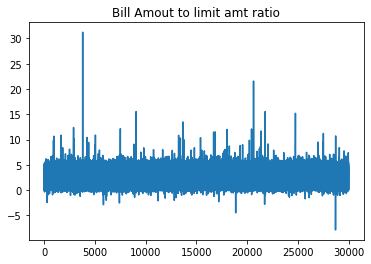

debt ratio abv 5 represents risk. Banks should consult borowers at this point.


In [ ]:
x['DEBT_RATIO'].plot()
plt.title('Bill Amout to limit amt ratio')
plt.show()
print('debt ratio abv 5 represents risk. Banks should consult borowers at this point.')

In [ ]:
from keras.backend import binary_crossentropy
model=Sequential()

input_size=len(x.columns)
model.add(Dense(34,activation='sigmoid',input_dim=(input_size)))
model.add(Dense(30,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
print(model.summary)
predictionResults=model.predict(x_test)

Epoch 1/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4624 - accuracy: 0.8054
Epoch 2/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4459 - accuracy: 0.8145
Epoch 3/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4447 - accuracy: 0.8129
Epoch 4/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4390 - accuracy: 0.8201
Epoch 5/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4405 - accuracy: 0.8162
Epoch 6/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4391 - accuracy: 0.8186
Epoch 7/10
657/657 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8201
Epoch 8/10
657/657 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8160
Epoch 9/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4310 - accuracy: 0.8207
Epoch 10/10
657/657 [==============================] - 2s 2ms/step - loss: 0.4307 - accuracy: 0.8215

In [ ]:
predictionResults.flatten()

array([0.08475431, 0.0646386 , 0.1063575 , ..., 0.1074005 , 0.0809574 ,
       0.08490413], dtype=float32)

In [ ]:
# Predicting on test set
y_pred = predictionResults > 0.5

In [ ]:
# Evaluating using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[6661,  379],
       [1246,  714]])

In [ ]:
6661+379

7040

In [ ]:
sensitivity(Recall) = 6661/7040

0.9461647727272727

In [ ]:
6661+714

7375

In [ ]:
Accuracy= 7375/9000

0.8194444444444444

prediction 0 is non default 1 is default


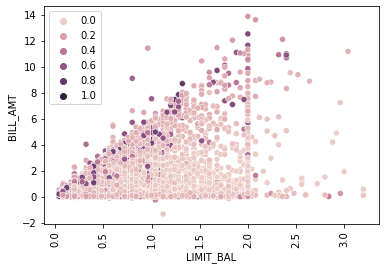

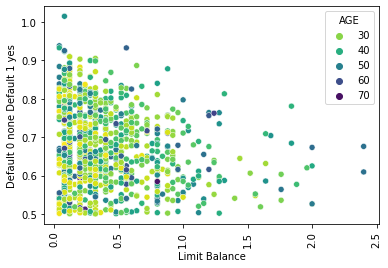

In [ ]:
#predictionResults= reduce(operator.concat, predictionResults)
print('prediction 0 is non default 1 is default')
pred= predictionResults.flatten()
hue=pred
sns.scatterplot(x=x_test['LIMIT_BAL'],y=x_test['BILL_AMT'],hue=hue)
plt.xticks(rotation=90)
plt.show()

filter=pred>.5
sns.scatterplot(y=pred[filter],x=x_test[filter]['LIMIT_BAL'], hue=x_test[filter]['AGE']*nf_age, palette='viridis_r')
plt.xticks(rotation=90)
plt.ylabel('Default 0 none Default 1 yes')
plt.xlabel('Limit Balance')
plt.show()